In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('job fake.csv')

In [3]:
data

,Unnamed: 0,job_id,title,location,country,state,city,department,salary_range,company_profile,...,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",US,NY,New York,Marketing,NaN,"We're Food52, and we've created a groundbreaki...",...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",NZ,,Auckland,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",US,IA,Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",US,DC,Washington,Sales,NaN,Our passion for improving quality of life thro...,...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",US,FL,Fort Worth,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,17876,Account Director - Distribution,"CA, ON, Toronto",CA,ON,Toronto,Sales,NaN,Vend is looking for some awesome new talent to...,...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17876,17877,Payroll Accountant,"US, PA, Philadelphia",US,PA,Philadelphia,Accounting,NaN,WebLinc is the e-commerce platform and service...,...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",US,TX,Houston,NaN,NaN,We Provide Full Time Permanent Positions for m...,...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17878,17879,Graphic Designer,"NG, LA, Lagos",NG,LA,Lagos,NaN,NaN,NaN,...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
data.shape

(17880, 22)

In [5]:
data.describe()

,Unnamed: 0,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8939.500000,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,5161.655742,0.202631,0.403492,0.499945,0.214688
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4469.750000,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8939.500000,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13409.250000,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17879.000000,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.columns

Index(['Unnamed: 0', 'job_id', 'title', 'location', 'country', 'state', 'city',
       'department', 'salary_range', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [7]:
data.isna().sum()

Unnamed: 0                 0
job_id                     0
title                      0
location                 346
country                  346
state                    440
city                     440
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
data['employment_type']= data['employment_type'].fillna('data_unavailable')
data['required_experience'] = data['required_experience'].fillna('data_unavailable')
data['required_education'] = data['required_education'].fillna('data_unavailable')

In [9]:
data = data.drop(['Unnamed: 0','location','salary_range','department','state','requirements','company_profile','benefits'],axis=1)

In [10]:
data.fillna(" ")

,job_id,title,country,city,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,US,New York,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,data_unavailable,,Marketing,0
1,2,Customer Service - Cloud Video Production,NZ,Auckland,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,data_unavailable,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),US,Wever,"Our client, located in Houston, is actively se...",0,1,0,data_unavailable,data_unavailable,data_unavailable,,,0
3,4,Account Executive - Washington DC,US,Washington,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,US,Fort Worth,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,CA,Toronto,Just in case this is the first time you’ve vis...,0,1,1,Full-time,Mid-Senior level,data_unavailable,Computer Software,Sales,0
17876,17877,Payroll Accountant,US,Philadelphia,The Payroll Accountant will focus primarily on...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,US,Houston,Experienced Project Cost Control Staff Enginee...,0,0,0,Full-time,data_unavailable,data_unavailable,,,0
17878,17879,Graphic Designer,NG,Lagos,Nemsia Studios is looking for an experienced v...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [11]:
data=data.drop(['job_id'],axis=1)

In [12]:
data

,title,country,city,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,US,New York,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,data_unavailable,NaN,Marketing,0
1,Customer Service - Cloud Video Production,NZ,Auckland,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,data_unavailable,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),US,Wever,"Our client, located in Houston, is actively se...",0,1,0,data_unavailable,data_unavailable,data_unavailable,NaN,NaN,0
3,Account Executive - Washington DC,US,Washington,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,US,Fort Worth,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,CA,Toronto,Just in case this is the first time you’ve vis...,0,1,1,Full-time,Mid-Senior level,data_unavailable,Computer Software,Sales,0
17876,Payroll Accountant,US,Philadelphia,The Payroll Accountant will focus primarily on...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,US,Houston,Experienced Project Cost Control Staff Enginee...,0,0,0,Full-time,data_unavailable,data_unavailable,NaN,NaN,0
17878,Graphic Designer,NG,Lagos,Nemsia Studios is looking for an experienced v...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [13]:
data.dtypes

title                  object
country                object
city                   object
description            object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [15]:
data.duplicated().sum()

425

In [16]:
data.drop_duplicates(inplace=True)

In [18]:
data

,title,country,city,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,US,New York,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,data_unavailable,NaN,Marketing,0
1,Customer Service - Cloud Video Production,NZ,Auckland,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,data_unavailable,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),US,Wever,"Our client, located in Houston, is actively se...",0,1,0,data_unavailable,data_unavailable,data_unavailable,NaN,NaN,0
3,Account Executive - Washington DC,US,Washington,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,US,Fort Worth,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,CA,Toronto,Just in case this is the first time you’ve vis...,0,1,1,Full-time,Mid-Senior level,data_unavailable,Computer Software,Sales,0
17876,Payroll Accountant,US,Philadelphia,The Payroll Accountant will focus primarily on...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,US,Houston,Experienced Project Cost Control Staff Enginee...,0,0,0,Full-time,data_unavailable,data_unavailable,NaN,NaN,0
17878,Graphic Designer,NG,Lagos,Nemsia Studios is looking for an experienced v...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [24]:
fake=data[data["fraudulent"]==0]["fraudulent"].count()
real=data[data["fraudulent"]==1]["fraudulent"].count()

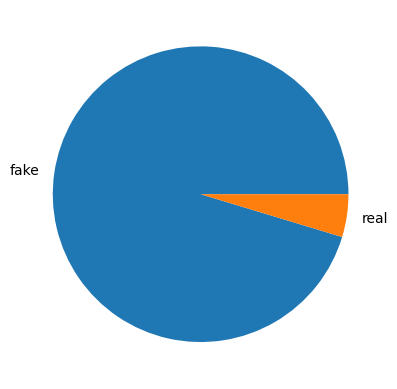

In [25]:
plt.pie([fake,real],labels=["fake","real"]);

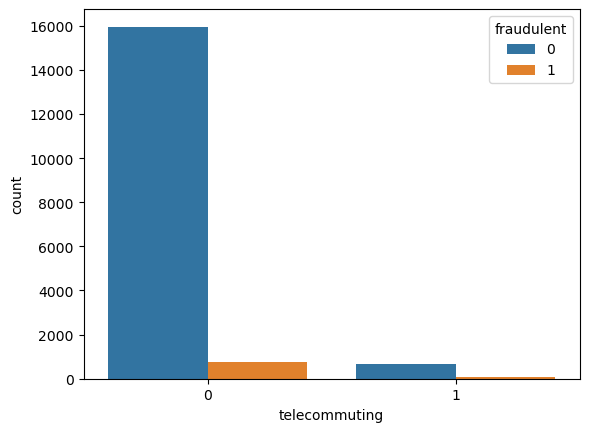

In [19]:
sns.countplot(x="telecommuting",hue="fraudulent",data=data);

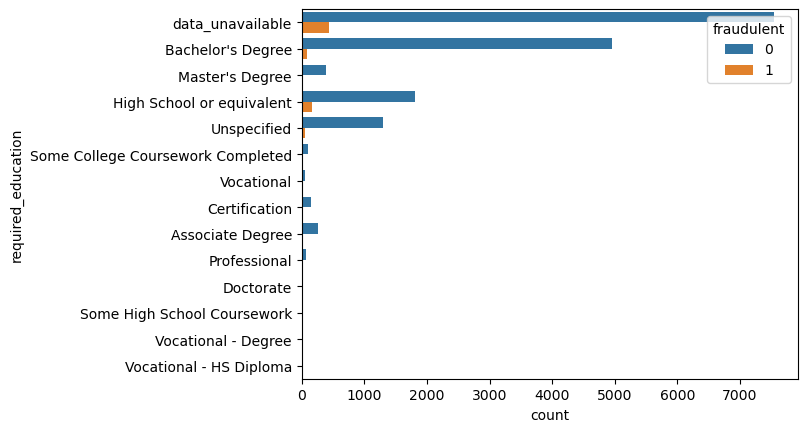

In [34]:
sns.countplot(y="required_education",hue="fraudulent",data=data);


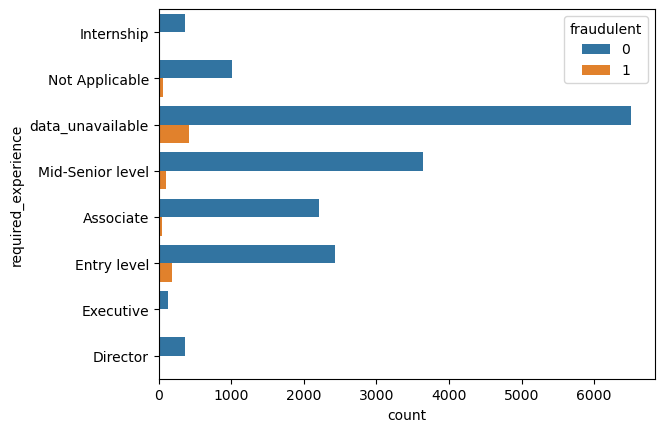

In [29]:
sns.countplot(y="required_experience",hue="fraudulent",data=data);

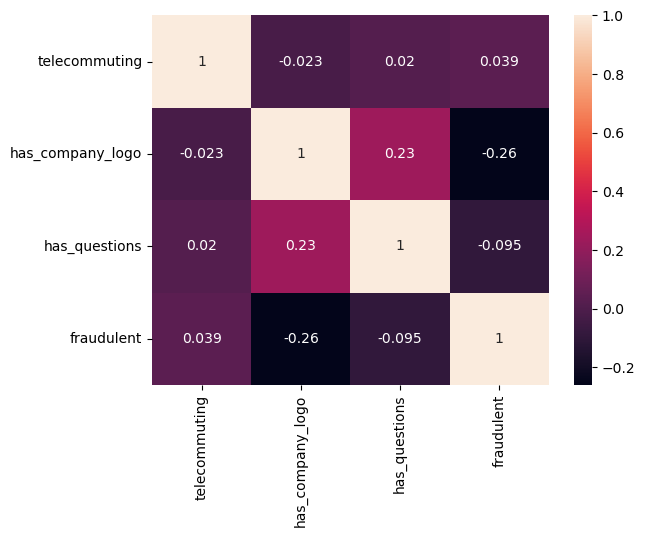

In [22]:
sns.heatmap(data[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);